# Visualizing statistical relationships

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

### 1. Numerical Data Ploting
- relplot() - Relationship
- scatterplot()
- lineplot()

### 2. Categorical Data Ploting
- catplot()
- boxplot()
- stripplot()
- swarmplot()
- etc...

### 3. Visualizing Distribution of the Data
- distplot()
- kdeplot()
- jointplot()
- rugplot()

### 4. Linear Regression and Relationship
- regplot()
- lmplot()

### 5. Controlling Ploted Figure Aesthetics
- figure styling
- axes styling
- color palettes
- etc..

- Relational plots: This plot is used to understand the relation between two variables.
- Categorical plots: This plot deals with categorical variables and how they can be visualized.
- Distribution plots: This plot is used for examining univariate and bivariate distributions
- Regression plots: The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses.
- Matrix plots: A matrix plot is an array of scatterplots.
- Multi-plot grids: It is an useful approach is to draw multiple instances of the same plot on different subsets of the dataset.

In [67]:
import seaborn as sns
import pandas as pd

In [2]:
sales = pd.read_excel('Sample - Superstore Sales (Excel).xls',0)
sales.head()

Row ID  Order ID Order Date Order Priority  Order Quantity       Sales  \
0       1         3 2010-10-13            Low               6    261.5400   
1      49       293 2012-10-01           High              49  10123.0200   
2      50       293 2012-10-01           High              27    244.5700   
3      80       483 2011-07-10           High              30   4965.7595   
4      85       515 2010-08-28  Not Specified              19    394.2700   

   Discount       Ship Mode     Profit  Unit Price  ...       Customer Name  \
0      0.04     Regular Air  -213.2500       38.94  ...  Muhammed MacIntyre   
1      0.07  Delivery Truck   457.8100      208.16  ...        Barry French   
2      0.01     Regular Air    46.7075        8.69  ...        Barry French   
3      0.08     Regular Air  1198.9710      195.99  ...       Clay Rozendal   
4      0.08     Regular Air    30.9400       21.78  ...      Carlos Soltero   

  Province   Region Customer Segment Product Category  \
0  Nunavut  Nunavut   Small Business  Office Supplies   
1  Nunavut  Nunavut         Consumer  Office Supplies   
2  Nunavut  Nunavut         Consumer  Office Supplies   
3  Nunavut  Nunavut        Corporate       Technology   
4  Nunavut  Nunavut         Consumer  Office Supplies   

             Product Sub-Category  \
0          Storage & Organization   
1                      Appliances   
2  Binders and Binder Accessories   
3    Telephones and Communication   
4                      Appliances   

                                        Product Name Product Container  \
0   Eldon Base for stackable storage shelf, platinum         Large Box   
1  1.7 Cubic Foot Compact "Cube" Office Refrigera...        Jumbo Drum   
2   Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl         Small Box   
3                                               R380         Small Box   
4                           Holmes HEPA Air Purifier        Medium Box   

  Product Base Margin  Ship Date  
0                0.80 2010-10-20  
1                0.58 2012-10-02  
2                0.39 2012-10-03  
3                0.58 2011-07-12  
4                0.50 2010-08-30  

[5 rows x 21 columns]

##  Relationship chart

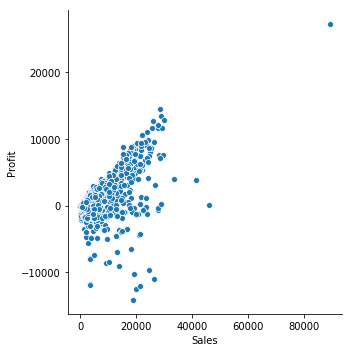

In [3]:
# Check the relatioship between sales and profit
sns.relplot('Sales','Profit',data = sales)

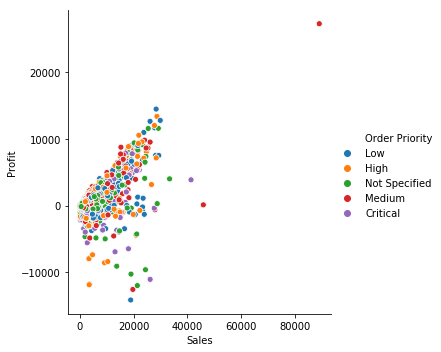

In [4]:
# Using cat color code using hue
sns.relplot('Sales','Profit',hue ='Order Priority',data = sales)

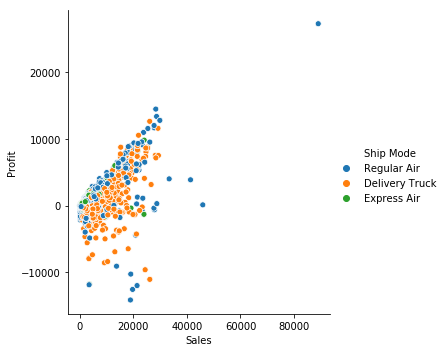

In [5]:
sns.relplot('Sales','Profit',hue ='Ship Mode',data = sales)

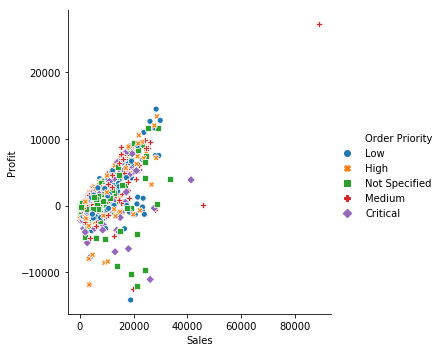

In [6]:
# with style
sns.relplot('Sales','Profit',hue ='Order Priority',style='Order Priority',data = sales)

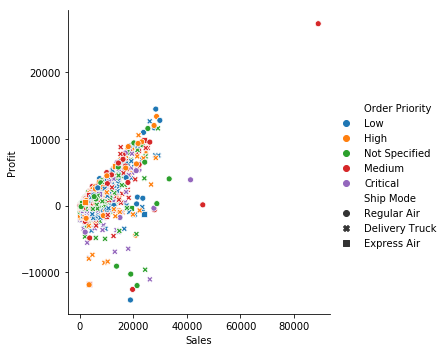

In [7]:
# hue & style
sns.relplot('Sales','Profit',hue ='Order Priority',style='Ship Mode',data = sales)

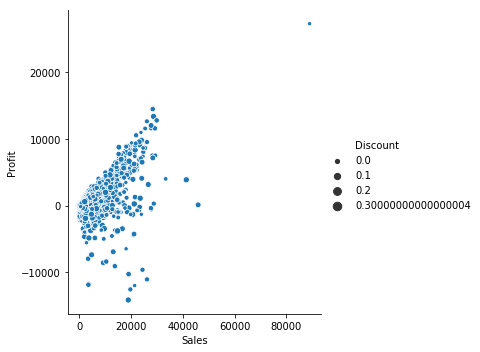

In [8]:
# dot size
sns.relplot('Sales','Profit',size='Discount',data = sales)

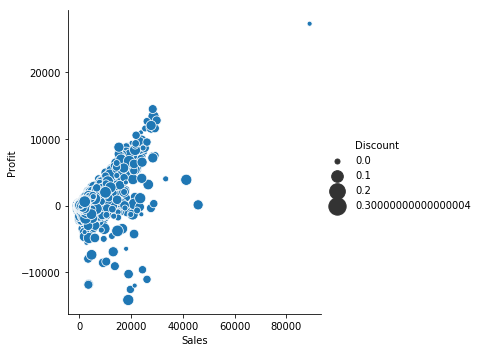

In [13]:
# the above one not clear uses sizes
sns.relplot('Sales','Profit',size='Discount',sizes = (25,300),data = sales)

## Line chart

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


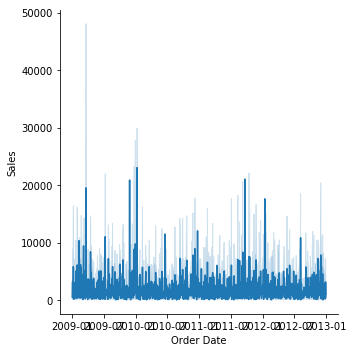

In [14]:
sns.relplot('Order Date','Sales',kind = 'line',data=sales);

In [15]:
# Instead of date we can use Year.
sales['Year']= sales['Order Date'].dt.year

In [16]:
sales.Year.unique()

array([2010, 2012, 2011, 2009], dtype=int64)

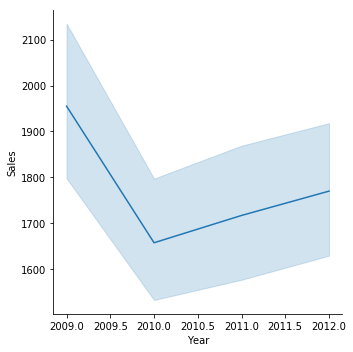

In [18]:
# Much better
# Here line is mean value
# Shadows is 90% confedence intravel
sns.relplot('Year','Sales',kind = 'line',data=sales);

In [20]:
sales['Sales_month']= sales['Order Date'].dt.month

In [22]:
sales['Sales_month'].unique()

array([10,  7,  8,  6,  3,  2, 11,  5,  4, 12,  1,  9], dtype=int64)

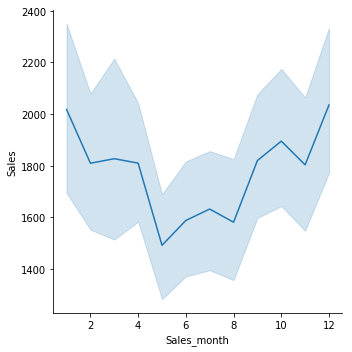

In [21]:
sns.relplot('Sales_month','Sales',kind = 'line',data=sales);

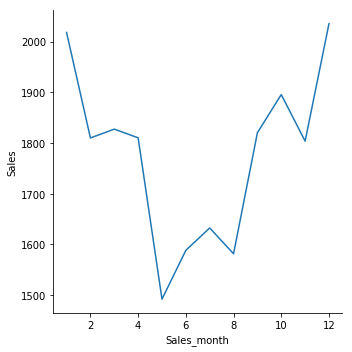

In [26]:
# Disbale the confidence interval.
sns.relplot('Sales_month','Sales',kind = 'line',data=sales,ci = None);

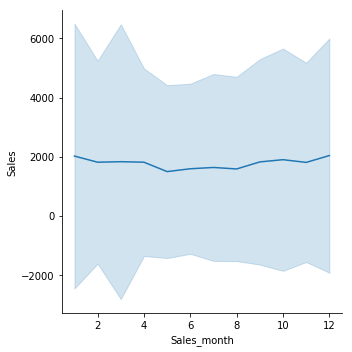

In [27]:
# confidence intravel with standard deviation
sns.relplot('Sales_month','Sales',kind = 'line',data=sales,ci = 'sd');

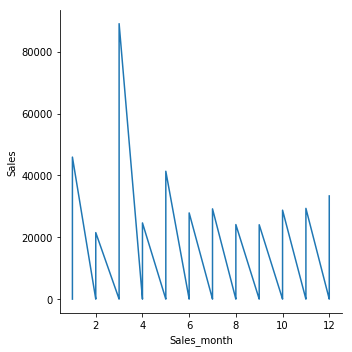

In [28]:
# Disable the mean instead of use original value connecting the dot
sns.relplot('Sales_month','Sales',kind = 'line',data=sales,estimator = None);

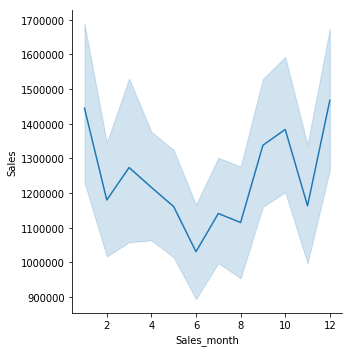

In [29]:
# Using sum  of sales &  confidence intravel
sns.relplot('Sales_month','Sales',kind = 'line',data=sales,estimator = sum);

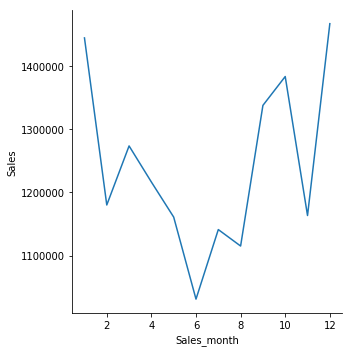

In [30]:
sns.relplot('Sales_month','Sales',kind = 'line',data=sales,estimator = sum,ci = None);

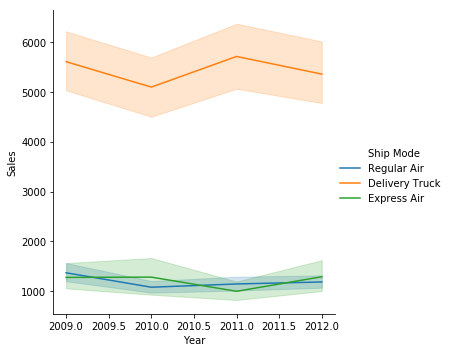

In [31]:
# Using hue - How delivary is going on in the total sales
# From this we can see most of the going on delivery truck
sns.relplot('Year','Sales',kind = 'line',hue = 'Ship Mode',data=sales);

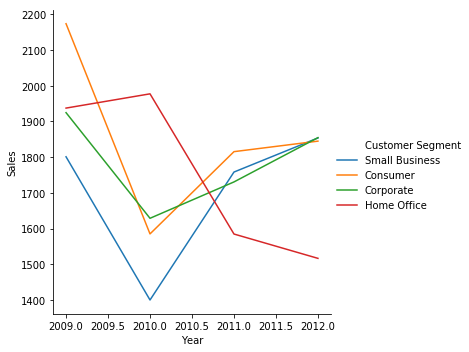

In [33]:
# Whcih segment haing high sales
sns.relplot('Year','Sales',kind = 'line',hue = 'Customer Segment',data=sales,ci = None);

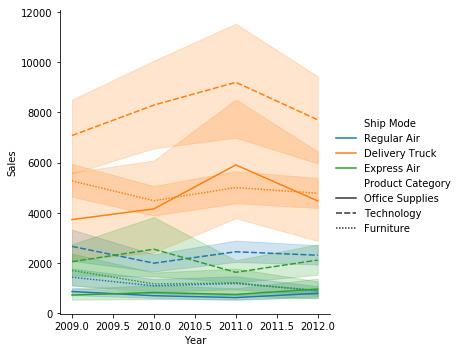

In [34]:
# with style
# Techonlogy product are shipped with delivary truck more
sns.relplot('Year','Sales',kind = 'line',hue = 'Ship Mode',data=sales,style ='Product Category' );

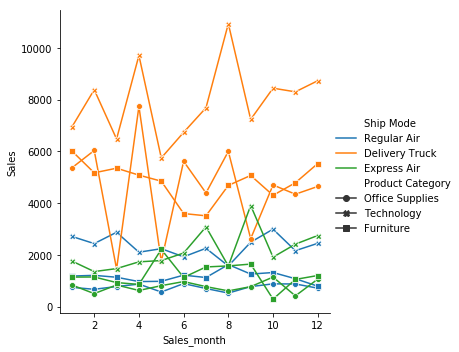

In [54]:
# using marker & other param
sns.relplot('Sales_month','Sales',kind = 'line',hue = 'Ship Mode',data=sales,style ='Product Category',markers = True, dashes = False,ci = None)

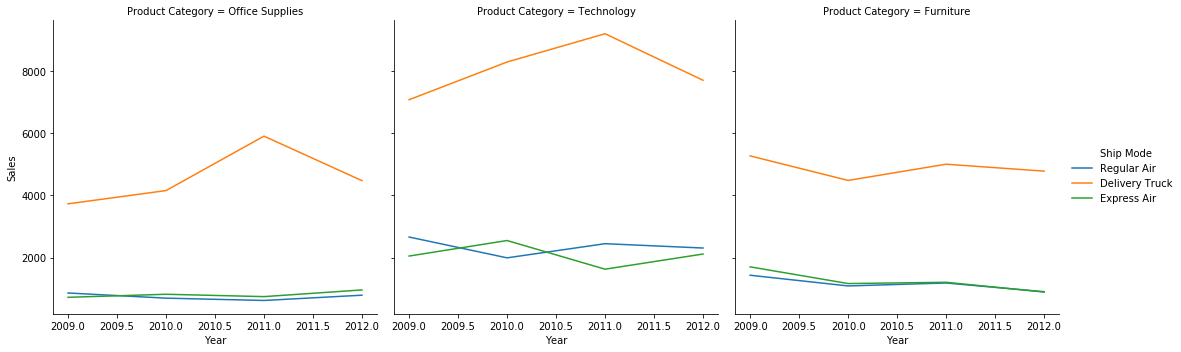

In [36]:
# Bit now I want each product cat & Y axis shared. Use col feature
sns.relplot('Year','Sales',kind = 'line',hue = 'Ship Mode',data=sales,col ='Product Category',ci = None );

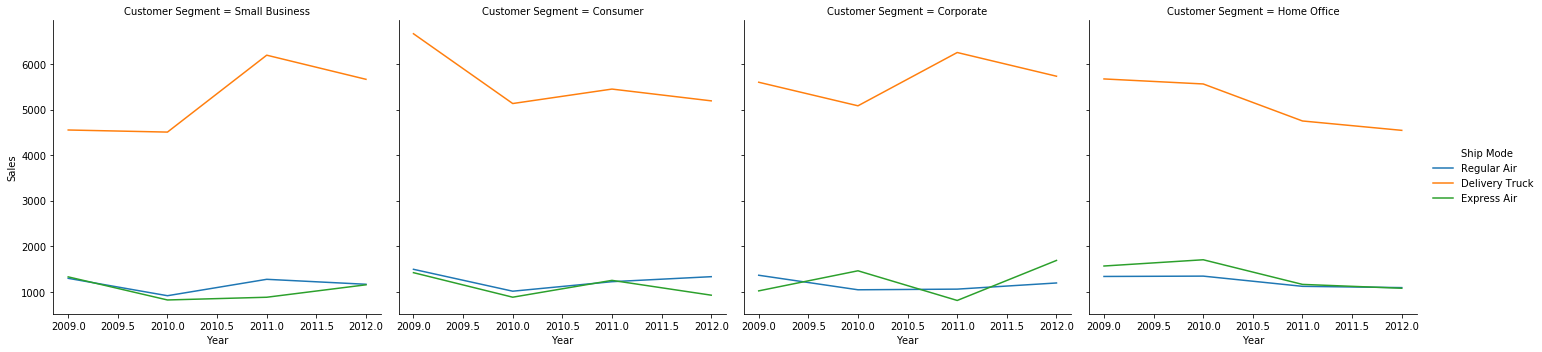

In [37]:
# Try with Customer Segment
sns.relplot('Year','Sales',kind = 'line',hue = 'Ship Mode',data=sales,col ='Customer Segment',ci = None );

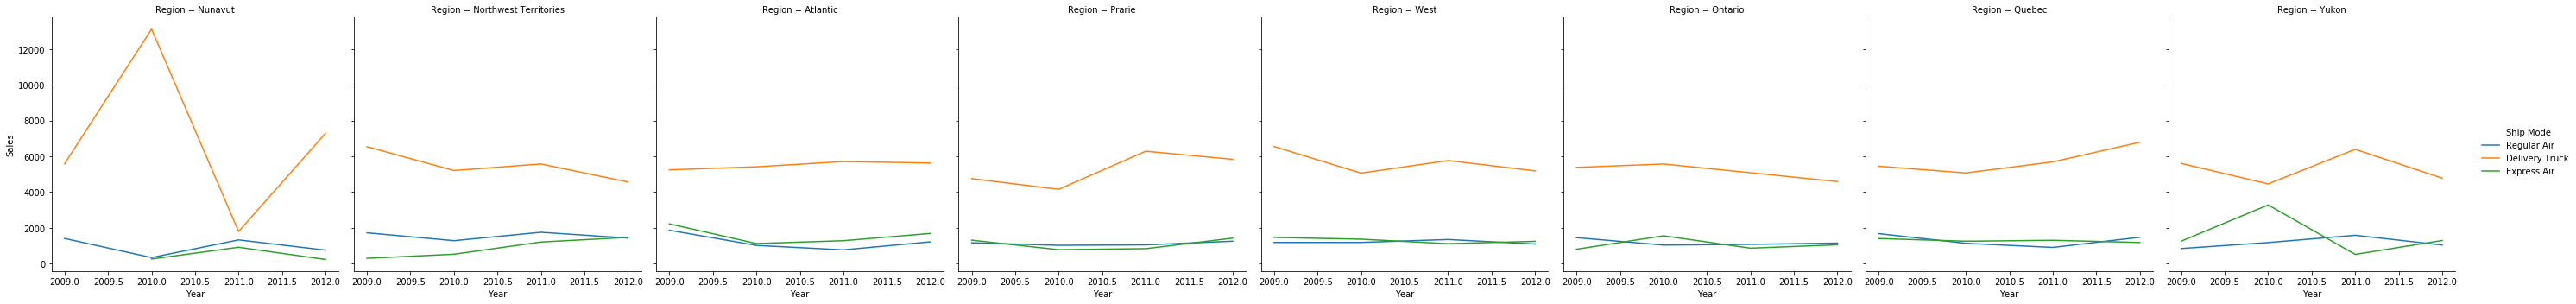

In [38]:
# Which region have high sales & type of shipment
sns.relplot('Year','Sales',kind = 'line',hue = 'Ship Mode',data=sales,col ='Region',ci = None );

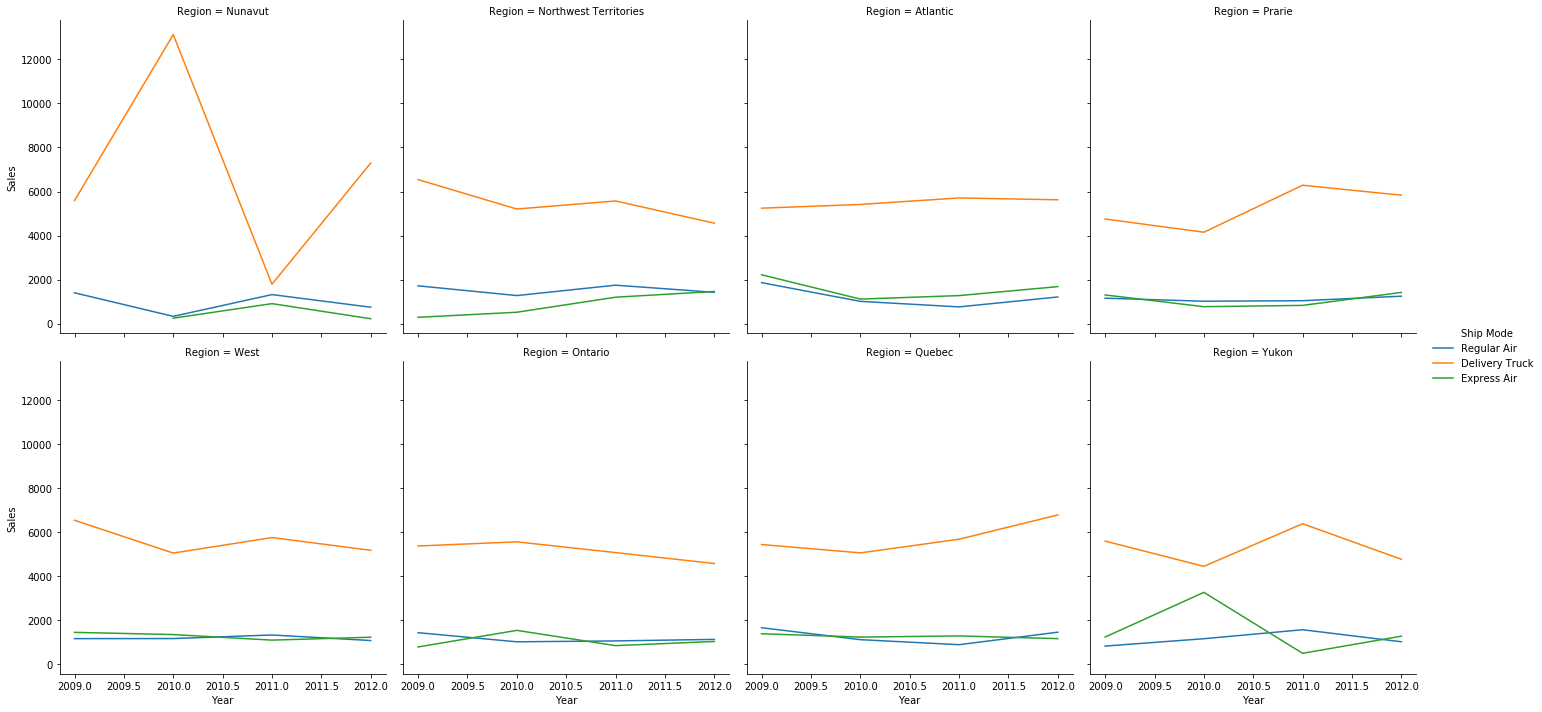

In [39]:
# if we want with 2 x4 using col_wrap command
sns.relplot('Year','Sales',kind = 'line',hue = 'Ship Mode',data=sales,col ='Region',col_wrap= 4,ci = None );

## Using Facet To Show Multiple Charts

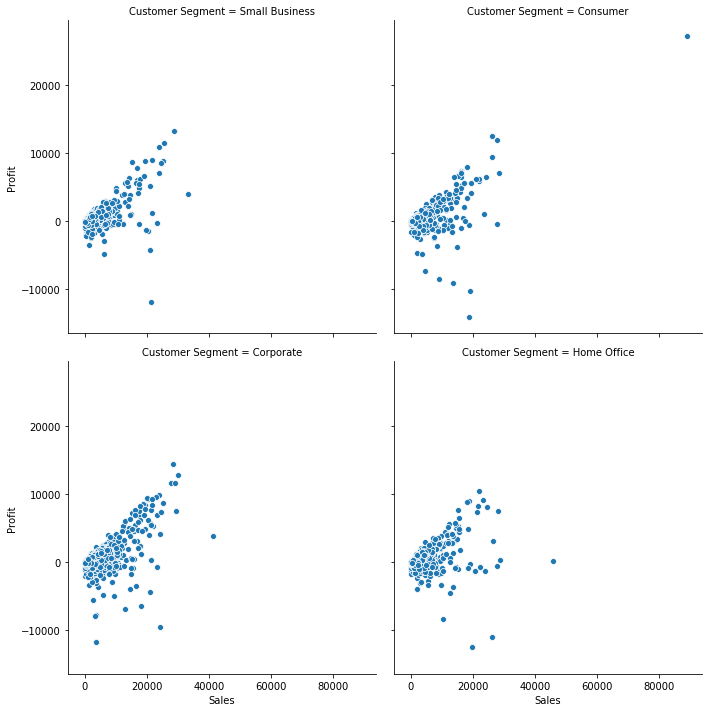

In [41]:
# Suppoue I need sales vs profit vs customer segment.
sns.relplot('Sales','Profit',data=sales,col ='Customer Segment',col_wrap =2 );

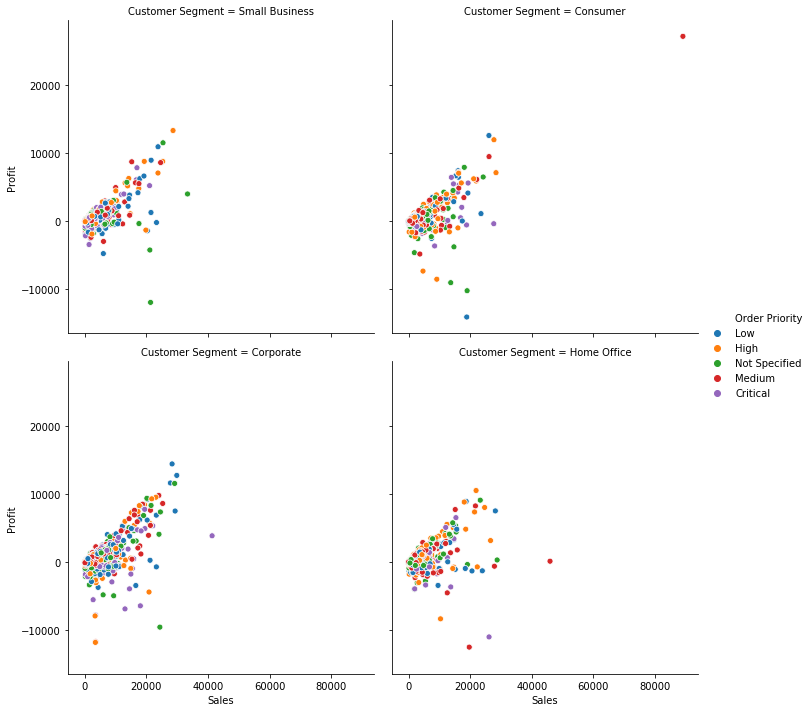

In [47]:
# Alogn with above we need clor coding
sns.relplot('Sales','Profit',data=sales,col ='Customer Segment',col_wrap =2,hue = 'Order Priority' );

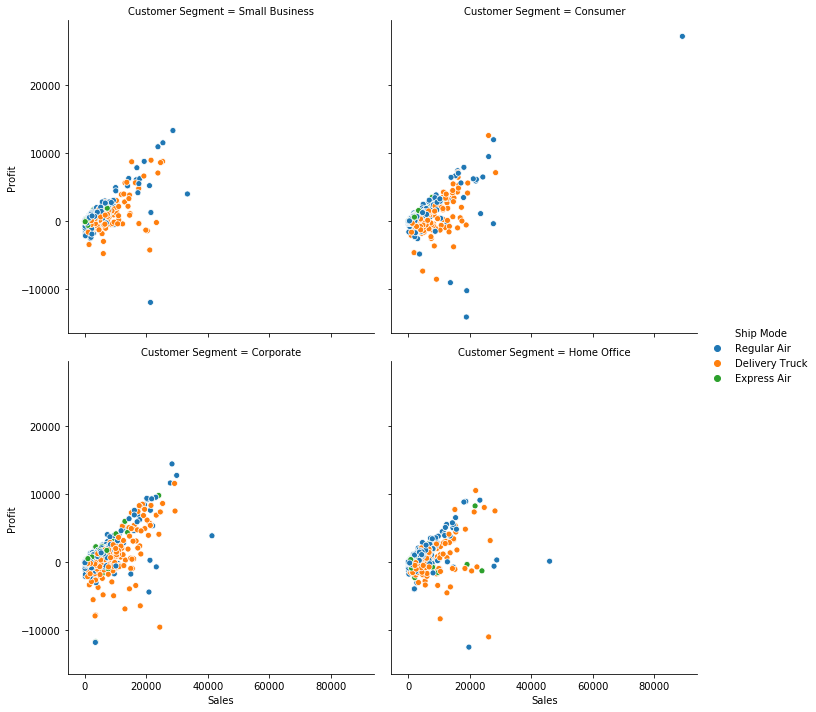

In [45]:
# Ship mode
sns.relplot('Sales','Profit',data=sales,col ='Customer Segment',col_wrap =2,hue = 'Ship Mode',sizes=(200,200) );

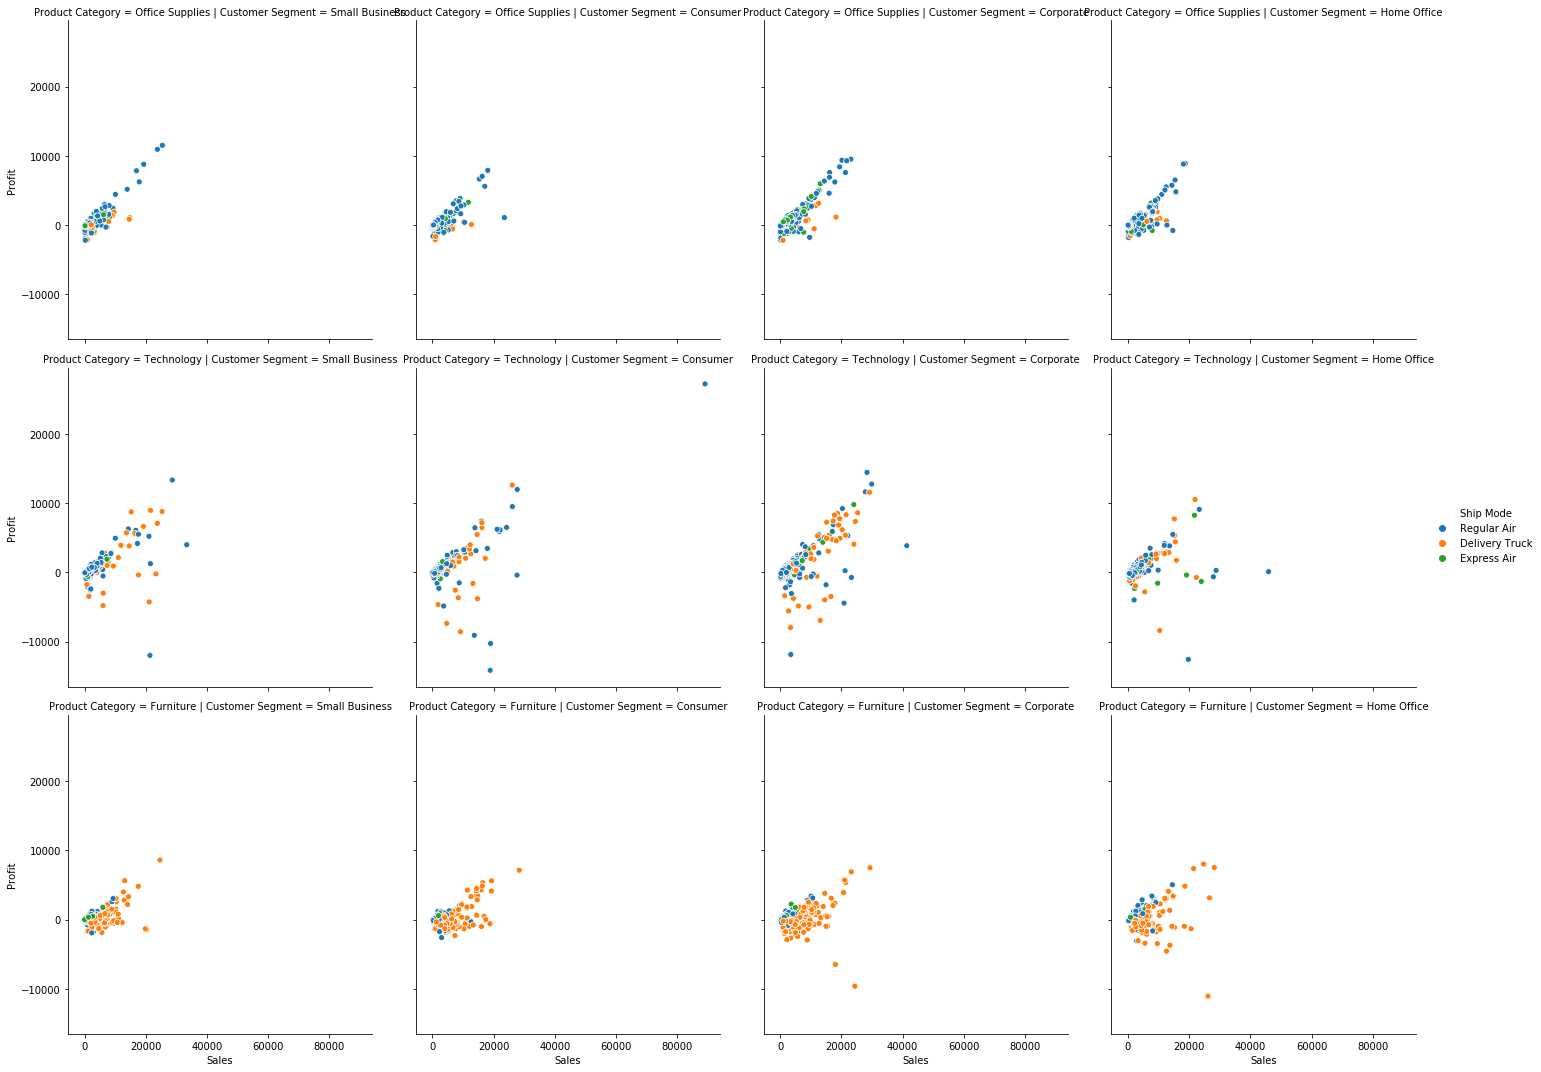

In [52]:
# Now I need each customer segement and  product cat 
sns.relplot('Sales','Profit',data=sales,col ='Customer Segment',row ='Product Category' ,hue = 'Ship Mode');

## Scatter plot

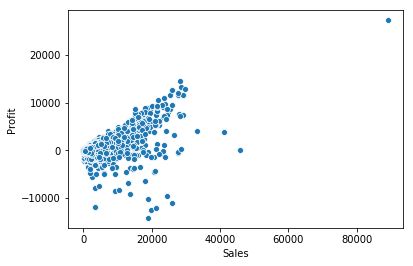

In [68]:
# Scatter plot
sns.scatterplot('Sales','Profit',data = sales)

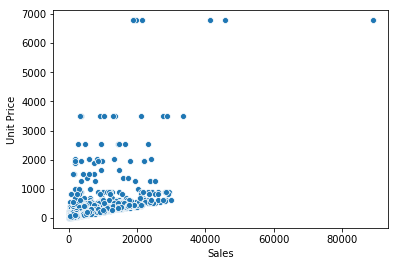

In [70]:
sns.scatterplot('Sales','Unit Price',data = sales)

## 2. Categorical Data Ploting

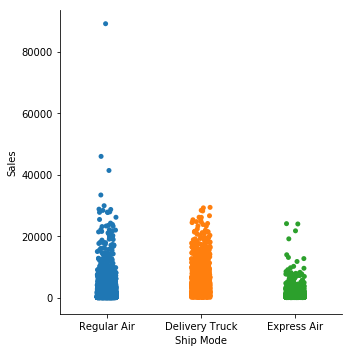

In [56]:
# Cat plot Ship mode va sales
sns.catplot('Ship Mode','Sales',data = sales)

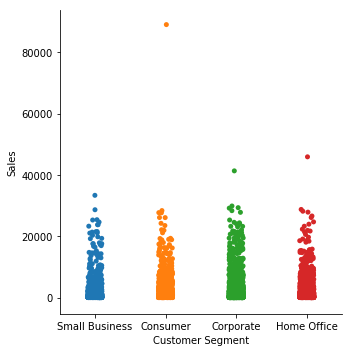

In [57]:
sns.catplot('Customer Segment','Sales',data = sales)

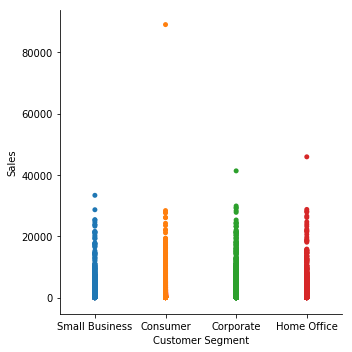

In [59]:
# Without magnitude (without widgth of data)
sns.catplot('Customer Segment','Sales',data = sales,jitter = False)

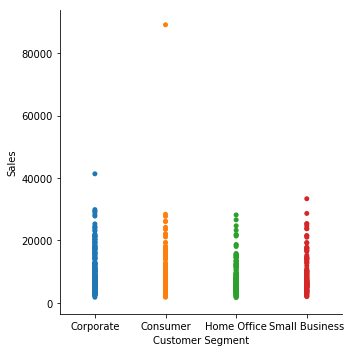

In [61]:
# With in grpah also we can query.
# Partial graph with custimzed data
# Eample query profit greater than  1000
sns.catplot('Customer Segment','Sales',data = sales.query("Profit > 1000"),jitter = False)

## Swarm plot

In [82]:
# https://www.geeksforgeeks.org/swarmplot-using-seaborn-in-python/

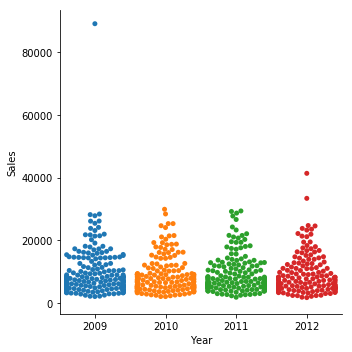

In [83]:
sns.catplot('Year','Sales',data = sales.query("Profit > 1000"),kind = 'swarm')

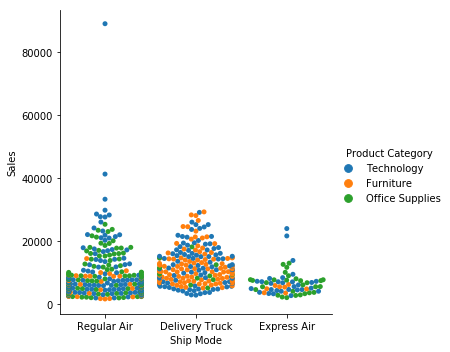

In [84]:
# using hue
sns.catplot('Ship Mode','Sales',data = sales.query("Profit > 1000"),kind = 'swarm',hue = 'Product Category')

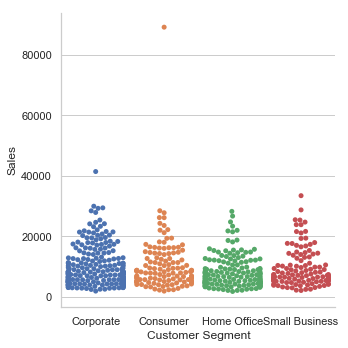

In [86]:
# How was the magnitude- ( Kind of scatter plot)
sns.set(style='whitegrid')
sns.catplot('Customer Segment','Sales',data = sales.query("Profit > 1000"),kind = 'swarm')

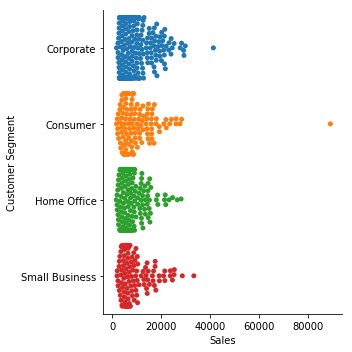

In [64]:
# Change the data point the plot will shows horizontal
sns.catplot('Sales','Customer Segment',data = sales.query("Profit > 1000"),kind = 'swarm')

## strip plot- Numeric

A strip plot is drawn on its own. It is a good complement to a boxplot or violinplot in cases where all observations are shown along with some representation of the underlying distribution. It is used to draw a scatter plot based on the category.

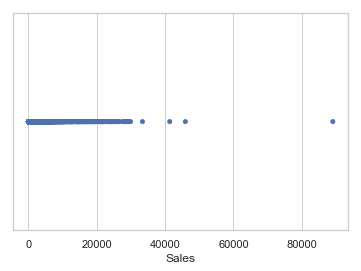

In [93]:
sns.stripplot(x = sales['Sales'],jitter =False)

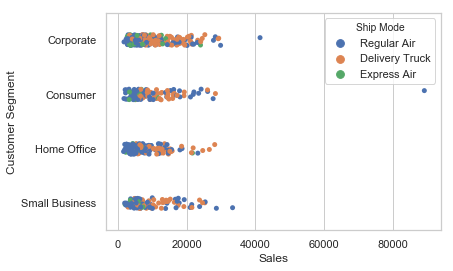

In [96]:
sns.stripplot('Sales','Customer Segment',data = sales.query("Profit > 1000"),hue = 'Ship Mode')

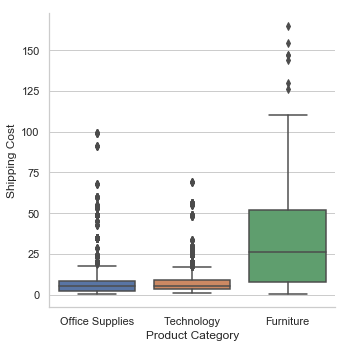

In [99]:
# Office suppiler is more outlier
sns.catplot(x = 'Product Category', y = 'Shipping Cost',data = sales,kind = 'box')

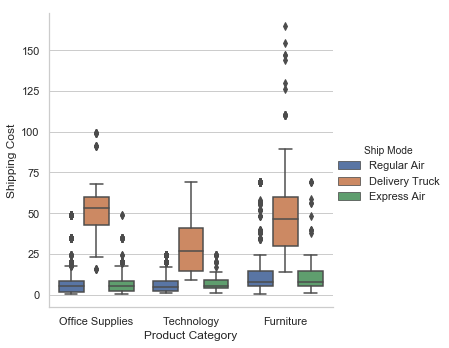

In [101]:
# Shipping cost  & alogn with ship mode
# we can see deliery truck is more shippemnt
sns.catplot(x = 'Product Category', y = 'Shipping Cost',hue = 'Ship Mode',data = sales,kind = 'box')

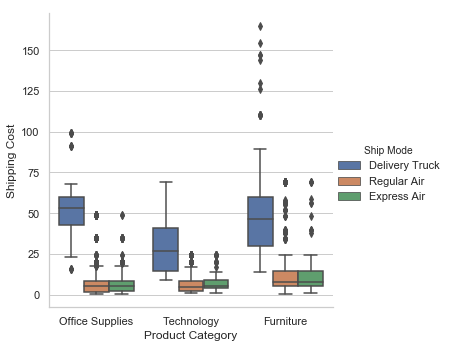

In [103]:
# I need in specific order format

sns.catplot(x = 'Product Category', y = 'Shipping Cost',hue = 'Ship Mode',hue_order = ['Delivery Truck','Regular Air','Express Air'],data = sales,kind = 'box')

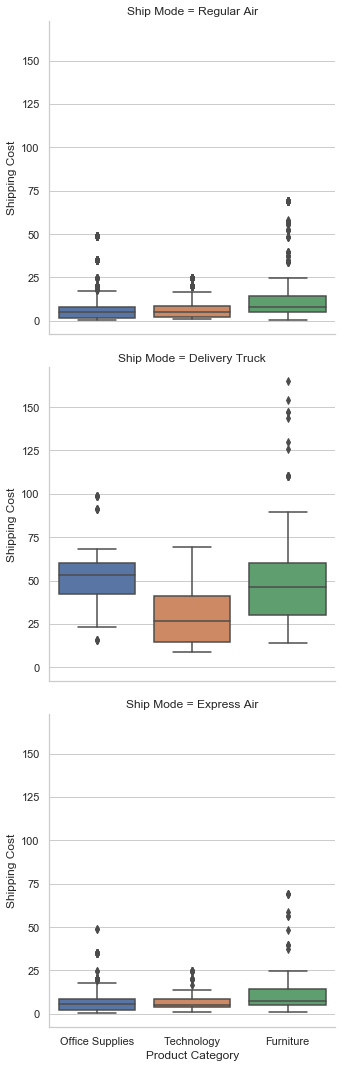

In [104]:
# we need anaysis independently
sns.catplot(x = 'Product Category', y = 'Shipping Cost',row = 'Ship Mode',data = sales,kind = 'box')

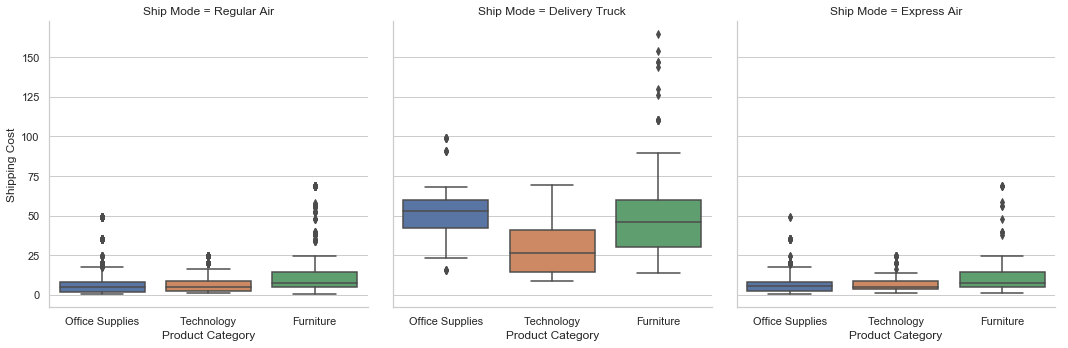

In [105]:
# Sigle column the ablove chart use col
sns.catplot(x = 'Product Category', y = 'Shipping Cost',col = 'Ship Mode',data = sales,kind = 'box')

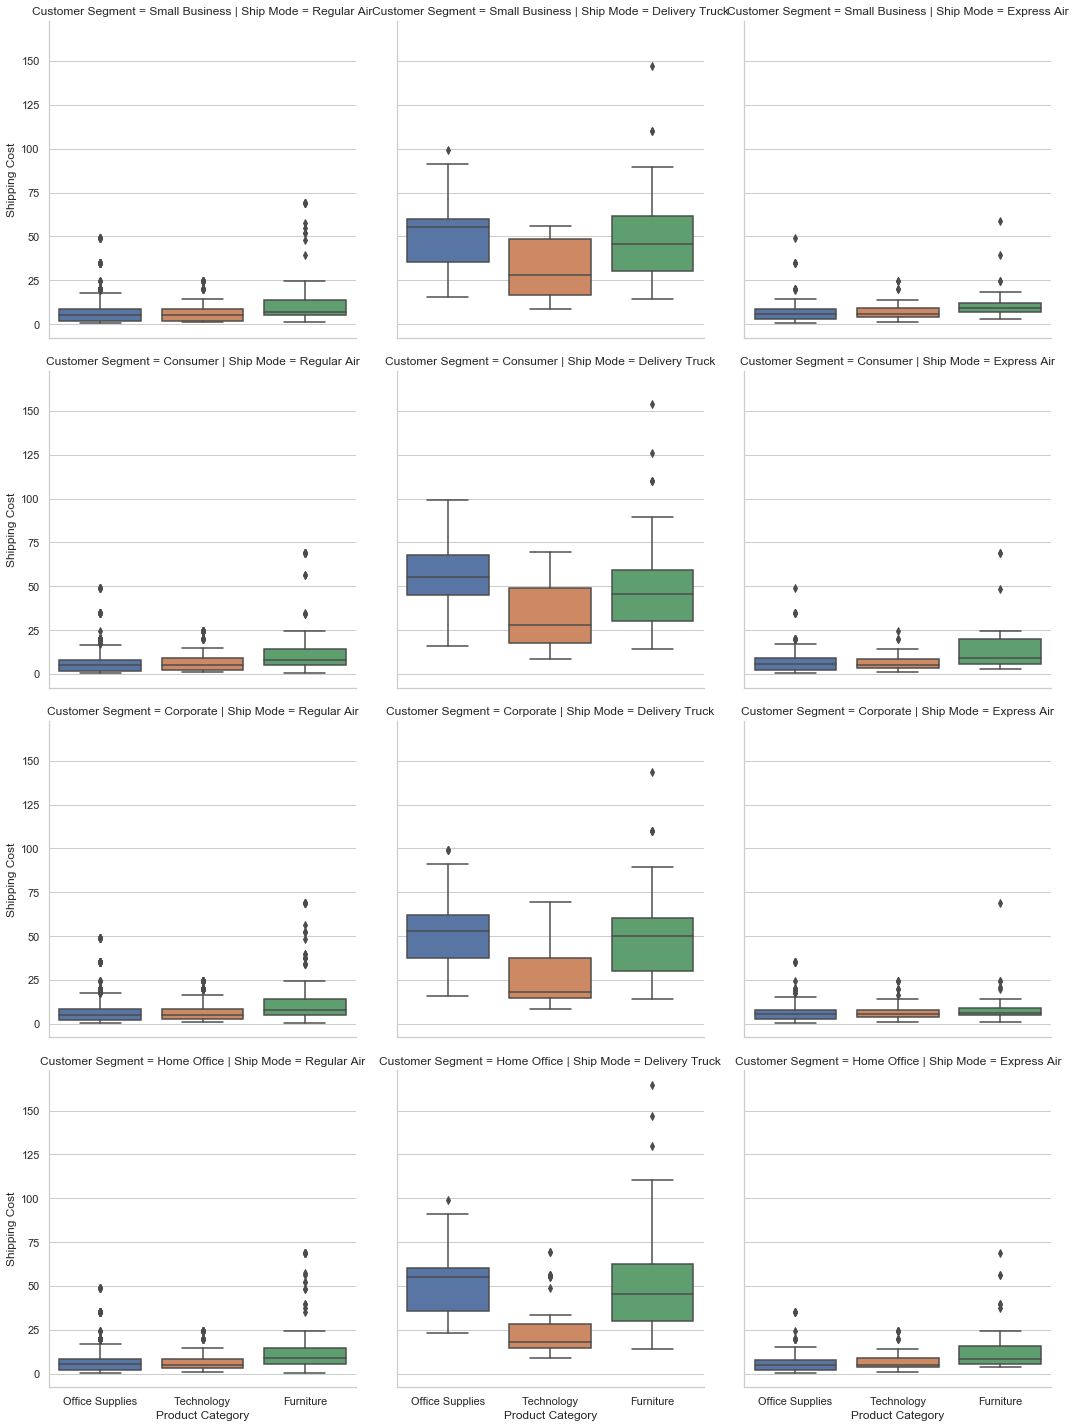

In [106]:
# anaysis with customer segment.
sns.catplot(x = 'Product Category', y = 'Shipping Cost',col = 'Ship Mode',row = 'Customer Segment',data = sales,kind = 'box')

## Violin chart
Distribution + box chart


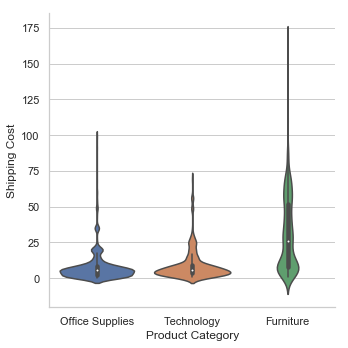

In [109]:
# we can see much better way how they data are distributed compare to box plot
sns.catplot(x= 'Product Category',y = 'Shipping Cost',data = sales, kind = 'violin')

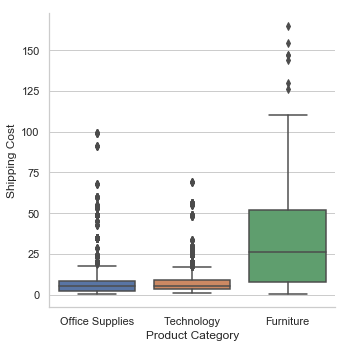

In [110]:
# Office suppiler is more outlier
sns.catplot(x = 'Product Category', y = 'Shipping Cost',data = sales,kind = 'box')

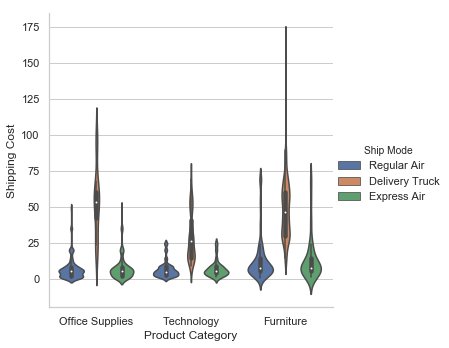

In [111]:
# Now how about shipping mode: - # 3 distribution created
# Most of them are delivary truck
sns.catplot(x= 'Product Category',y = 'Shipping Cost',data = sales, kind = 'violin',hue ='Ship Mode')

In [116]:
# Using split true we need to use hue has only two categort 
#sns.catplot(x= 'Product Category',y = 'Shipping Cost',data = sales, kind = 'violin',hue ='Region',split = True)

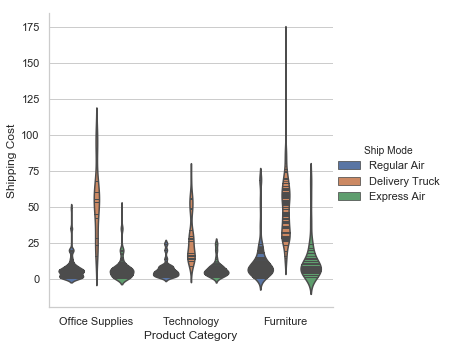

In [112]:
# include the data present using inner
sns.catplot(x= 'Product Category',y = 'Shipping Cost',data = sales, kind = 'violin',hue ='Ship Mode',inner= 'stick')

In [ ]:
# Swamrm & violin combined
sns.violinplot(x ='Year', y ='Sales', data = sales) 
sns.swarmplot(x ='Year', y ='Sales', data = sales, color ='black') 

## Bar

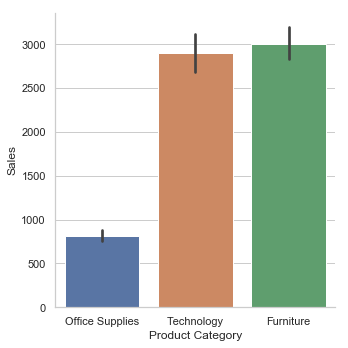

In [118]:
# 3 cat 
sns.catplot(x= 'Product Category',y = 'Sales',data = sales, kind = 'bar')

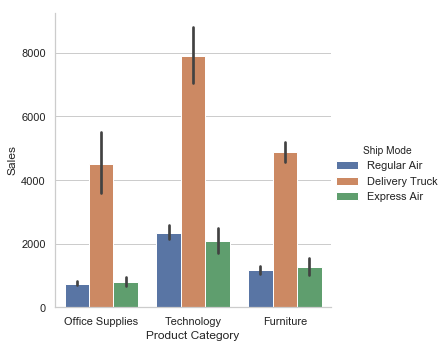

In [119]:
# Along with ship mode
sns.catplot(x= 'Product Category',y = 'Sales',data = sales, kind = 'bar',hue = 'Ship Mode')

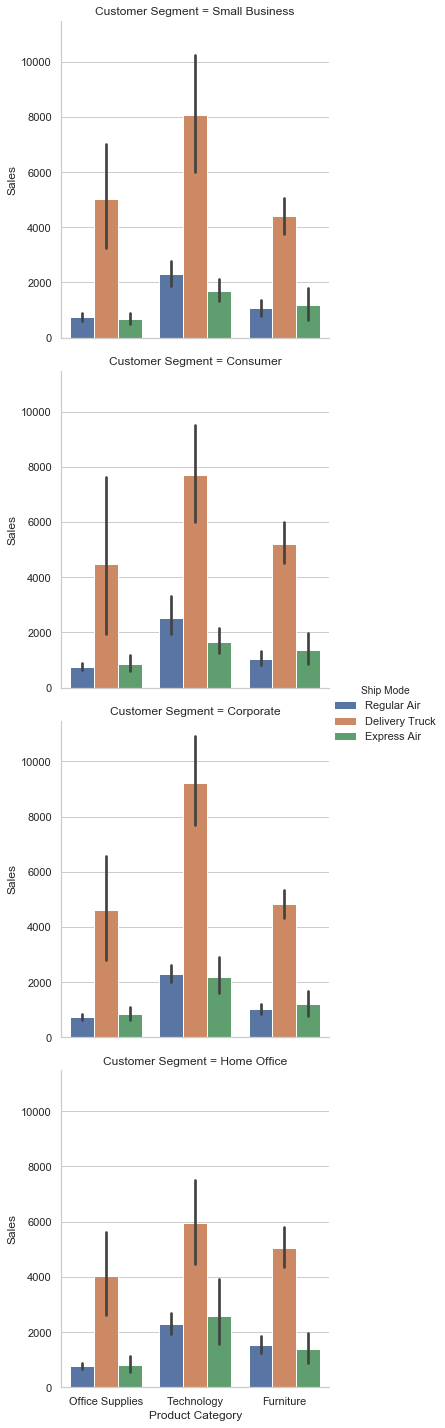

In [120]:
# For each customer segement
sns.catplot(x= 'Product Category',y = 'Sales',data = sales, kind = 'bar',hue = 'Ship Mode',row = 'Customer Segment')

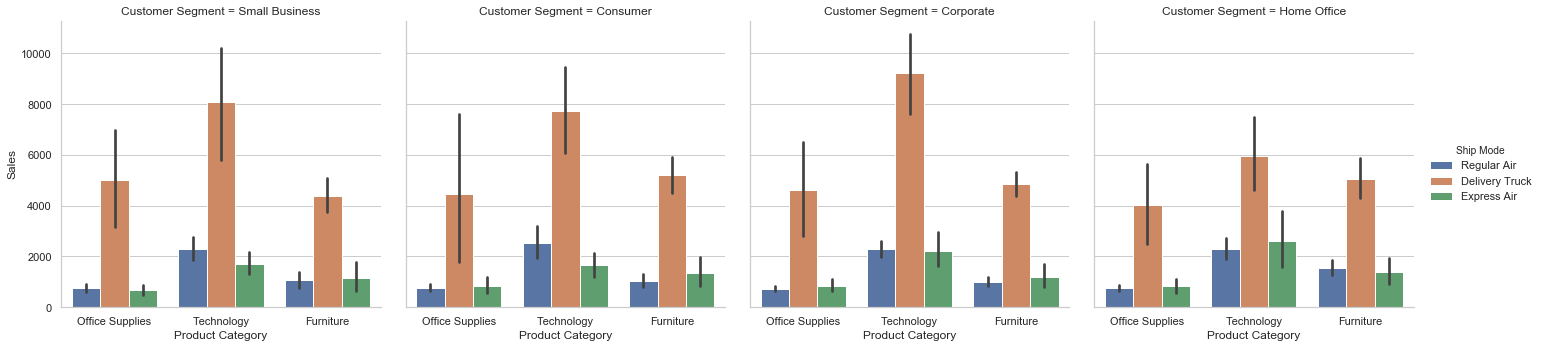

In [121]:
sns.catplot(x= 'Product Category',y = 'Sales',data = sales, kind = 'bar',hue = 'Ship Mode',col = 'Customer Segment')

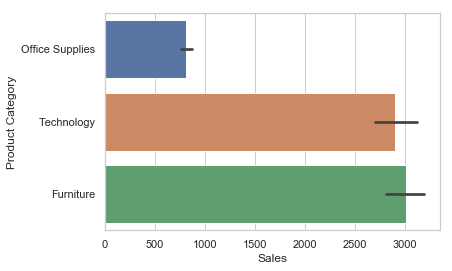

In [142]:
# Change the horizontal change the x & y postion.
sns.barplot(y = 'Product Category',x='Sales' ,data = sales)

# point plot
How point are connected

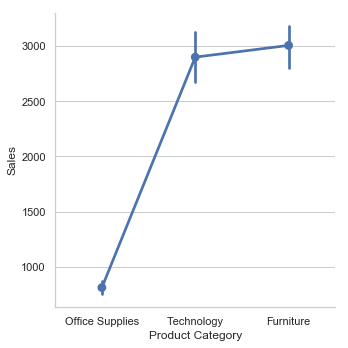

In [132]:
# Change the horizontal change the x & y postion.
sns.catplot(x= 'Product Category',y = 'Sales',data = sales, kind = 'point')

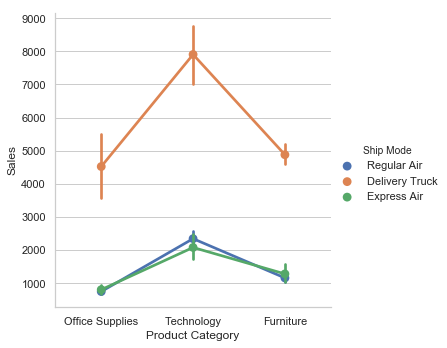

In [133]:
sns.catplot(x= 'Product Category',y = 'Sales',data = sales, kind = 'point',hue = 'Ship Mode')

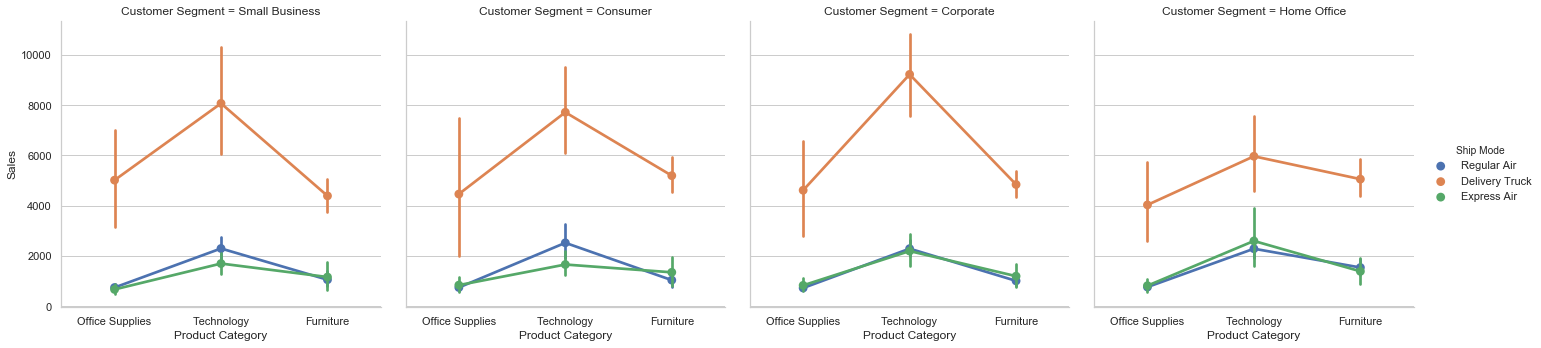

In [137]:
sns.catplot(x= 'Product Category',y = 'Sales',data = sales, kind = 'point',col = 'Customer Segment',hue = 'Ship Mode')

##  Boxenplot


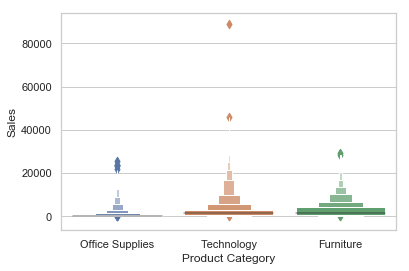

In [149]:
sns.boxenplot(x= 'Product Category',y = 'Sales',data = sales);

## Distplot

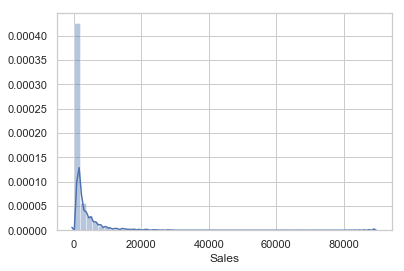

In [150]:
# Numerical data
# starting from zero it's increase
sns.distplot(sales.Sales)

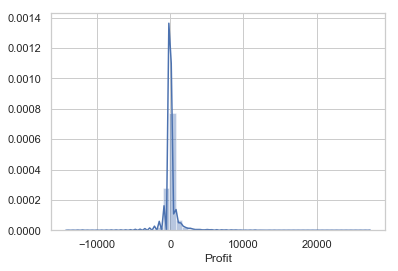

In [151]:
# we can see goes below zero also
sns.distplot(sales.Profit)

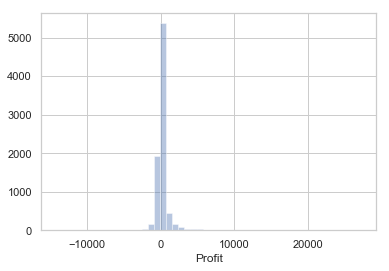

In [152]:
# getride of line, Kernal density
sns.distplot(sales.Profit,kde = False)

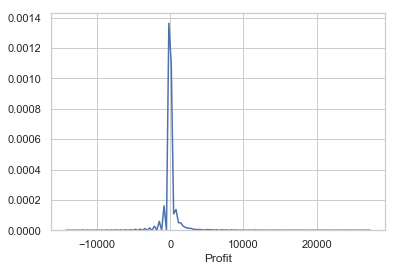

In [153]:
sns.distplot(sales.Profit,hist = False)

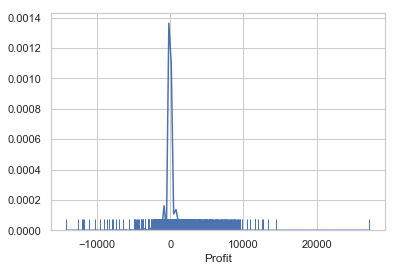

In [154]:
# constration of data along with distribution
sns.distplot(sales.Profit,hist = False,rug = True)

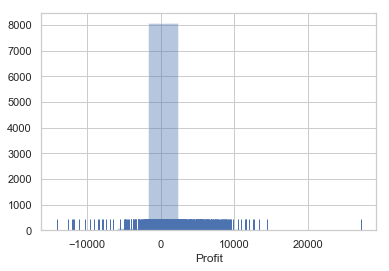

In [158]:
# bin
sns.distplot(sales.Profit,kde = False,rug = True,bins = 10)

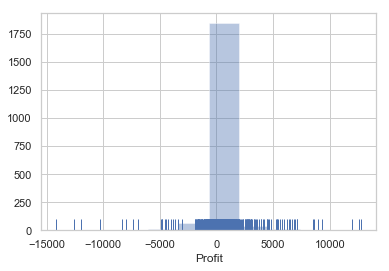

In [161]:
# data distribution With particualr region
sns.distplot(sales.Profit[sales.Region =='West'],kde = False,rug = True,bins = 10)

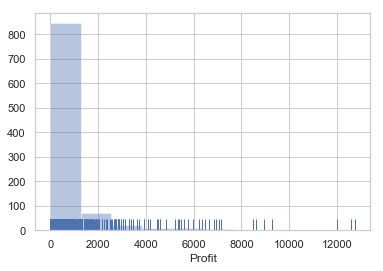

In [163]:
# only for profit grater than & West Region
sns.distplot(sales.Profit[(sales.Region =='West' )& (sales.Profit >0)],kde = False,rug = True,bins = 10)

## KDE Plot
How titly control the density plot

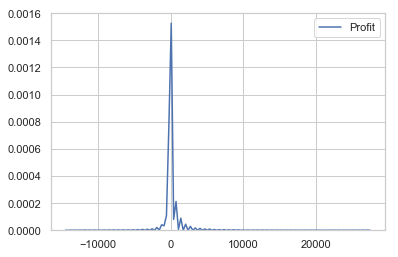

In [168]:
sns.kdeplot(sales.Profit,bw = 100)

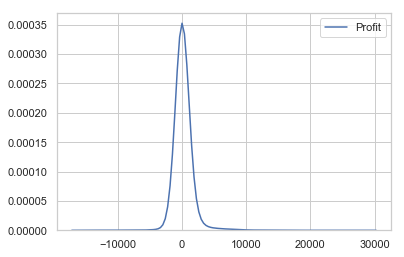

In [169]:
# Better normal shape
sns.kdeplot(sales.Profit,bw = 1000)

In [172]:
from scipy  import stats
import numpy as np

In [181]:
# The data is followin gamma or bette pattern
a = np.random.gamma(6,size = 200)

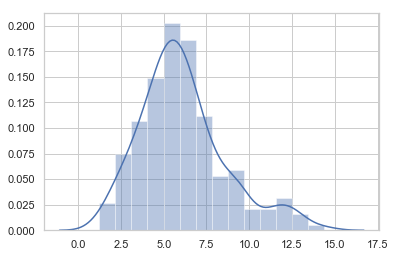

In [182]:
sns.distplot(a)

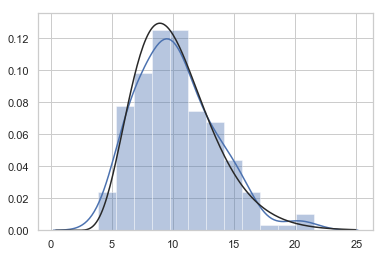

In [183]:
# How to fit gamma distrtibution - Block line
a = np.random.gamma(10,size = 200)
sns.distplot(a,fit = stats.gamma)

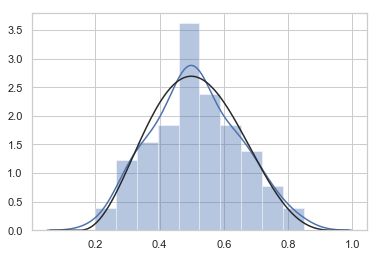

In [184]:
# Bette distribtuion black line
b = np.random.beta(7,7,size = 200)
sns.distplot(b,fit = stats.beta)

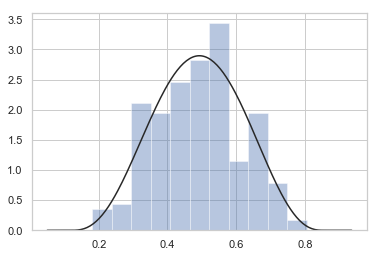

In [188]:
# Remove kde line
b = np.random.beta(7,7,size = 200)
sns.distplot(b,fit = stats.beta,kde = False)

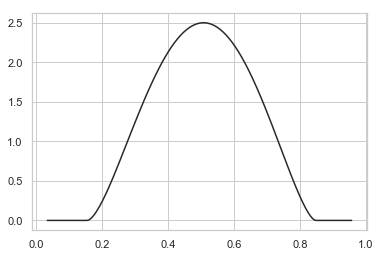

In [189]:
# Remove kde line & bar get ride
b = np.random.beta(7,7,size = 200)
sns.distplot(b,fit = stats.beta,kde = False,hist = False)

## Joint plot
scatter + distribution

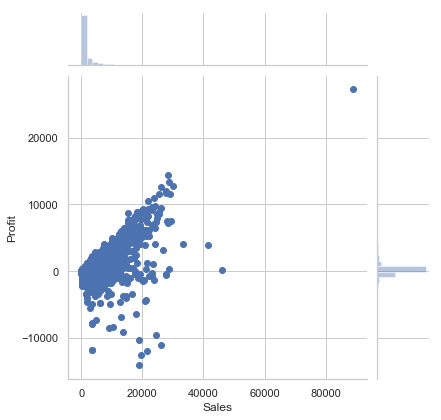

In [190]:
sns.jointplot('Sales','Profit',data = sales)

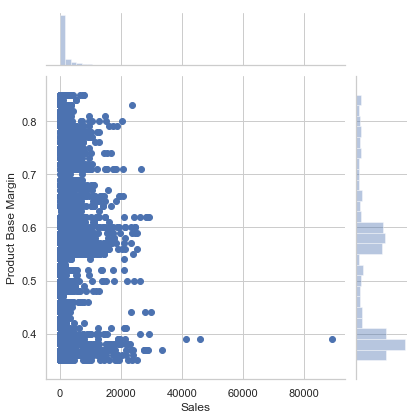

In [194]:
sns.jointplot('Sales','Product Base Margin',data = sales)

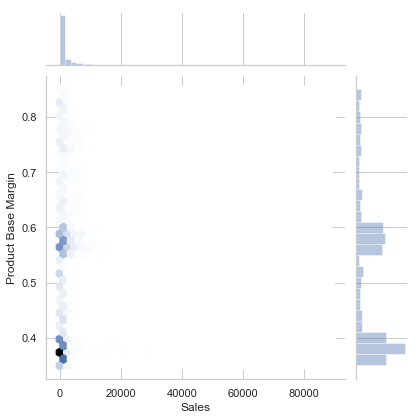

In [195]:
# Using hex check the constration of the value
sns.jointplot('Sales','Product Base Margin',data = sales,kind = 'hex')

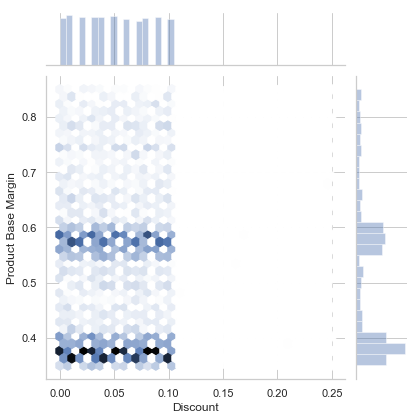

In [196]:
sns.jointplot('Discount','Product Base Margin',data = sales,kind = 'hex')

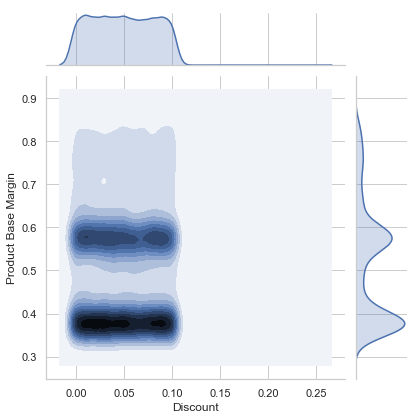

In [198]:
# More advanced
sns.jointplot('Discount','Product Base Margin',data = sales,kind = 'kde')

# Pair plot
where ever numeric data

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


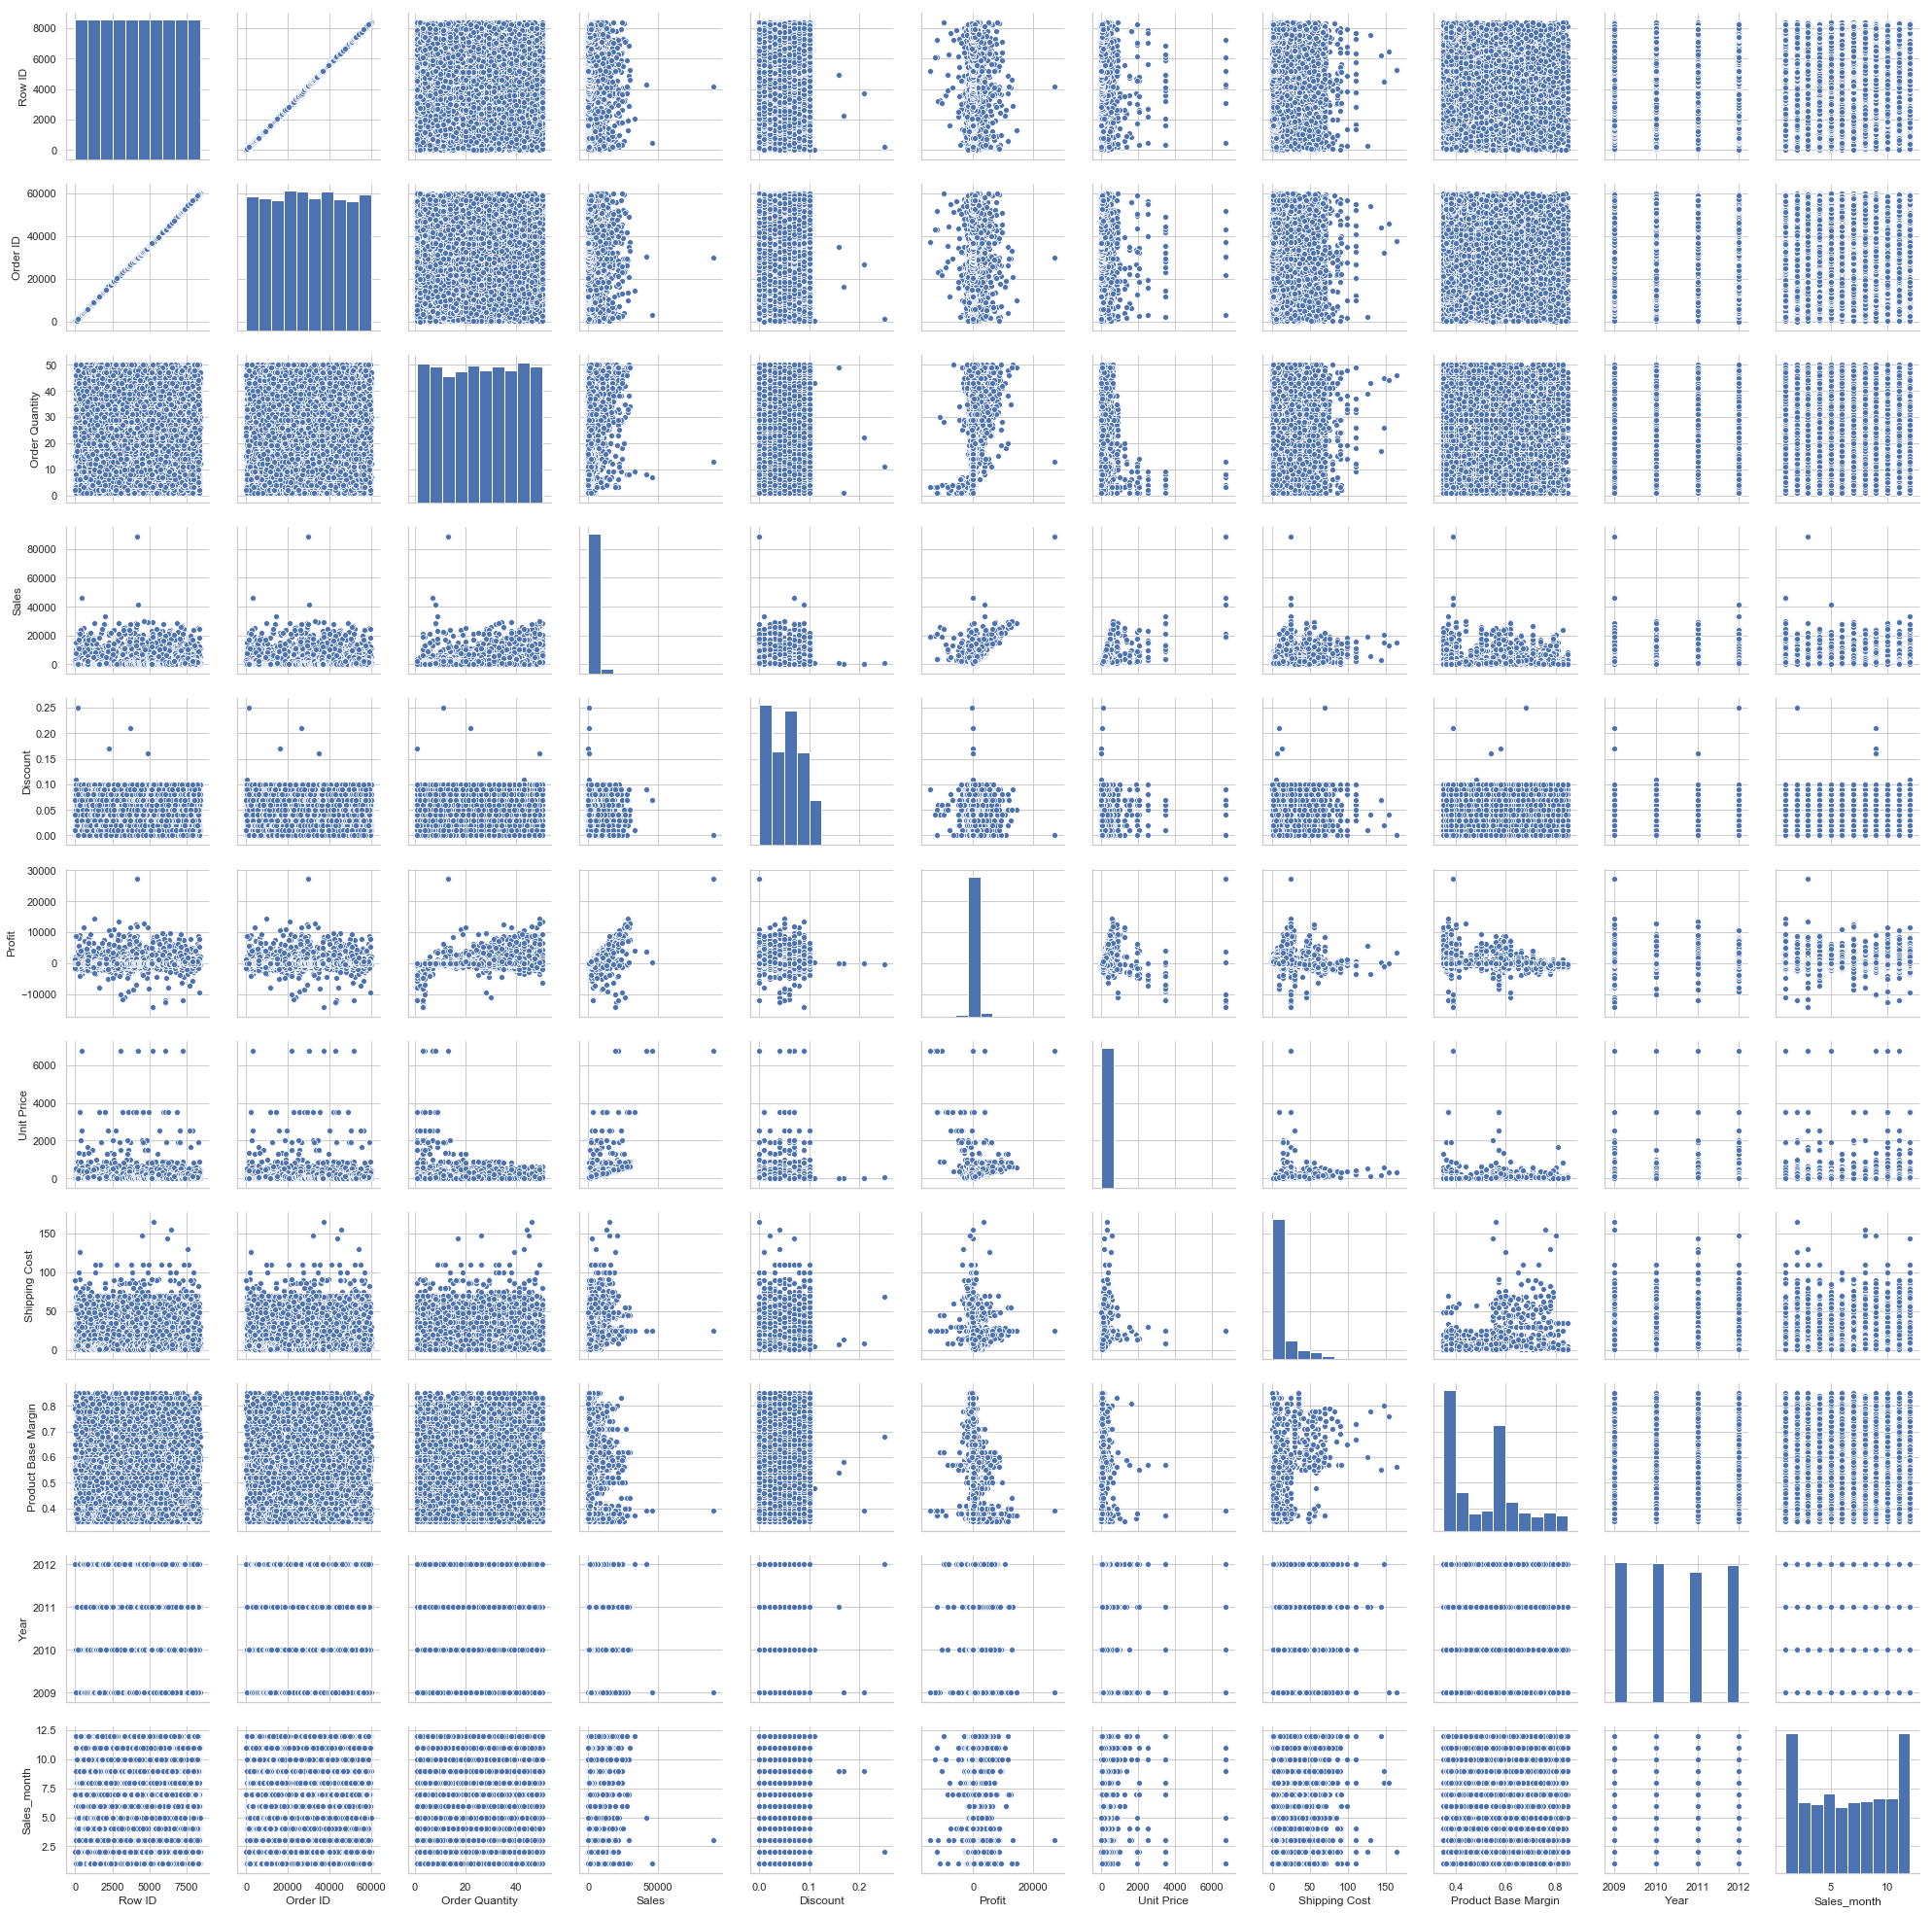

In [199]:
sns.pairplot(sales)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


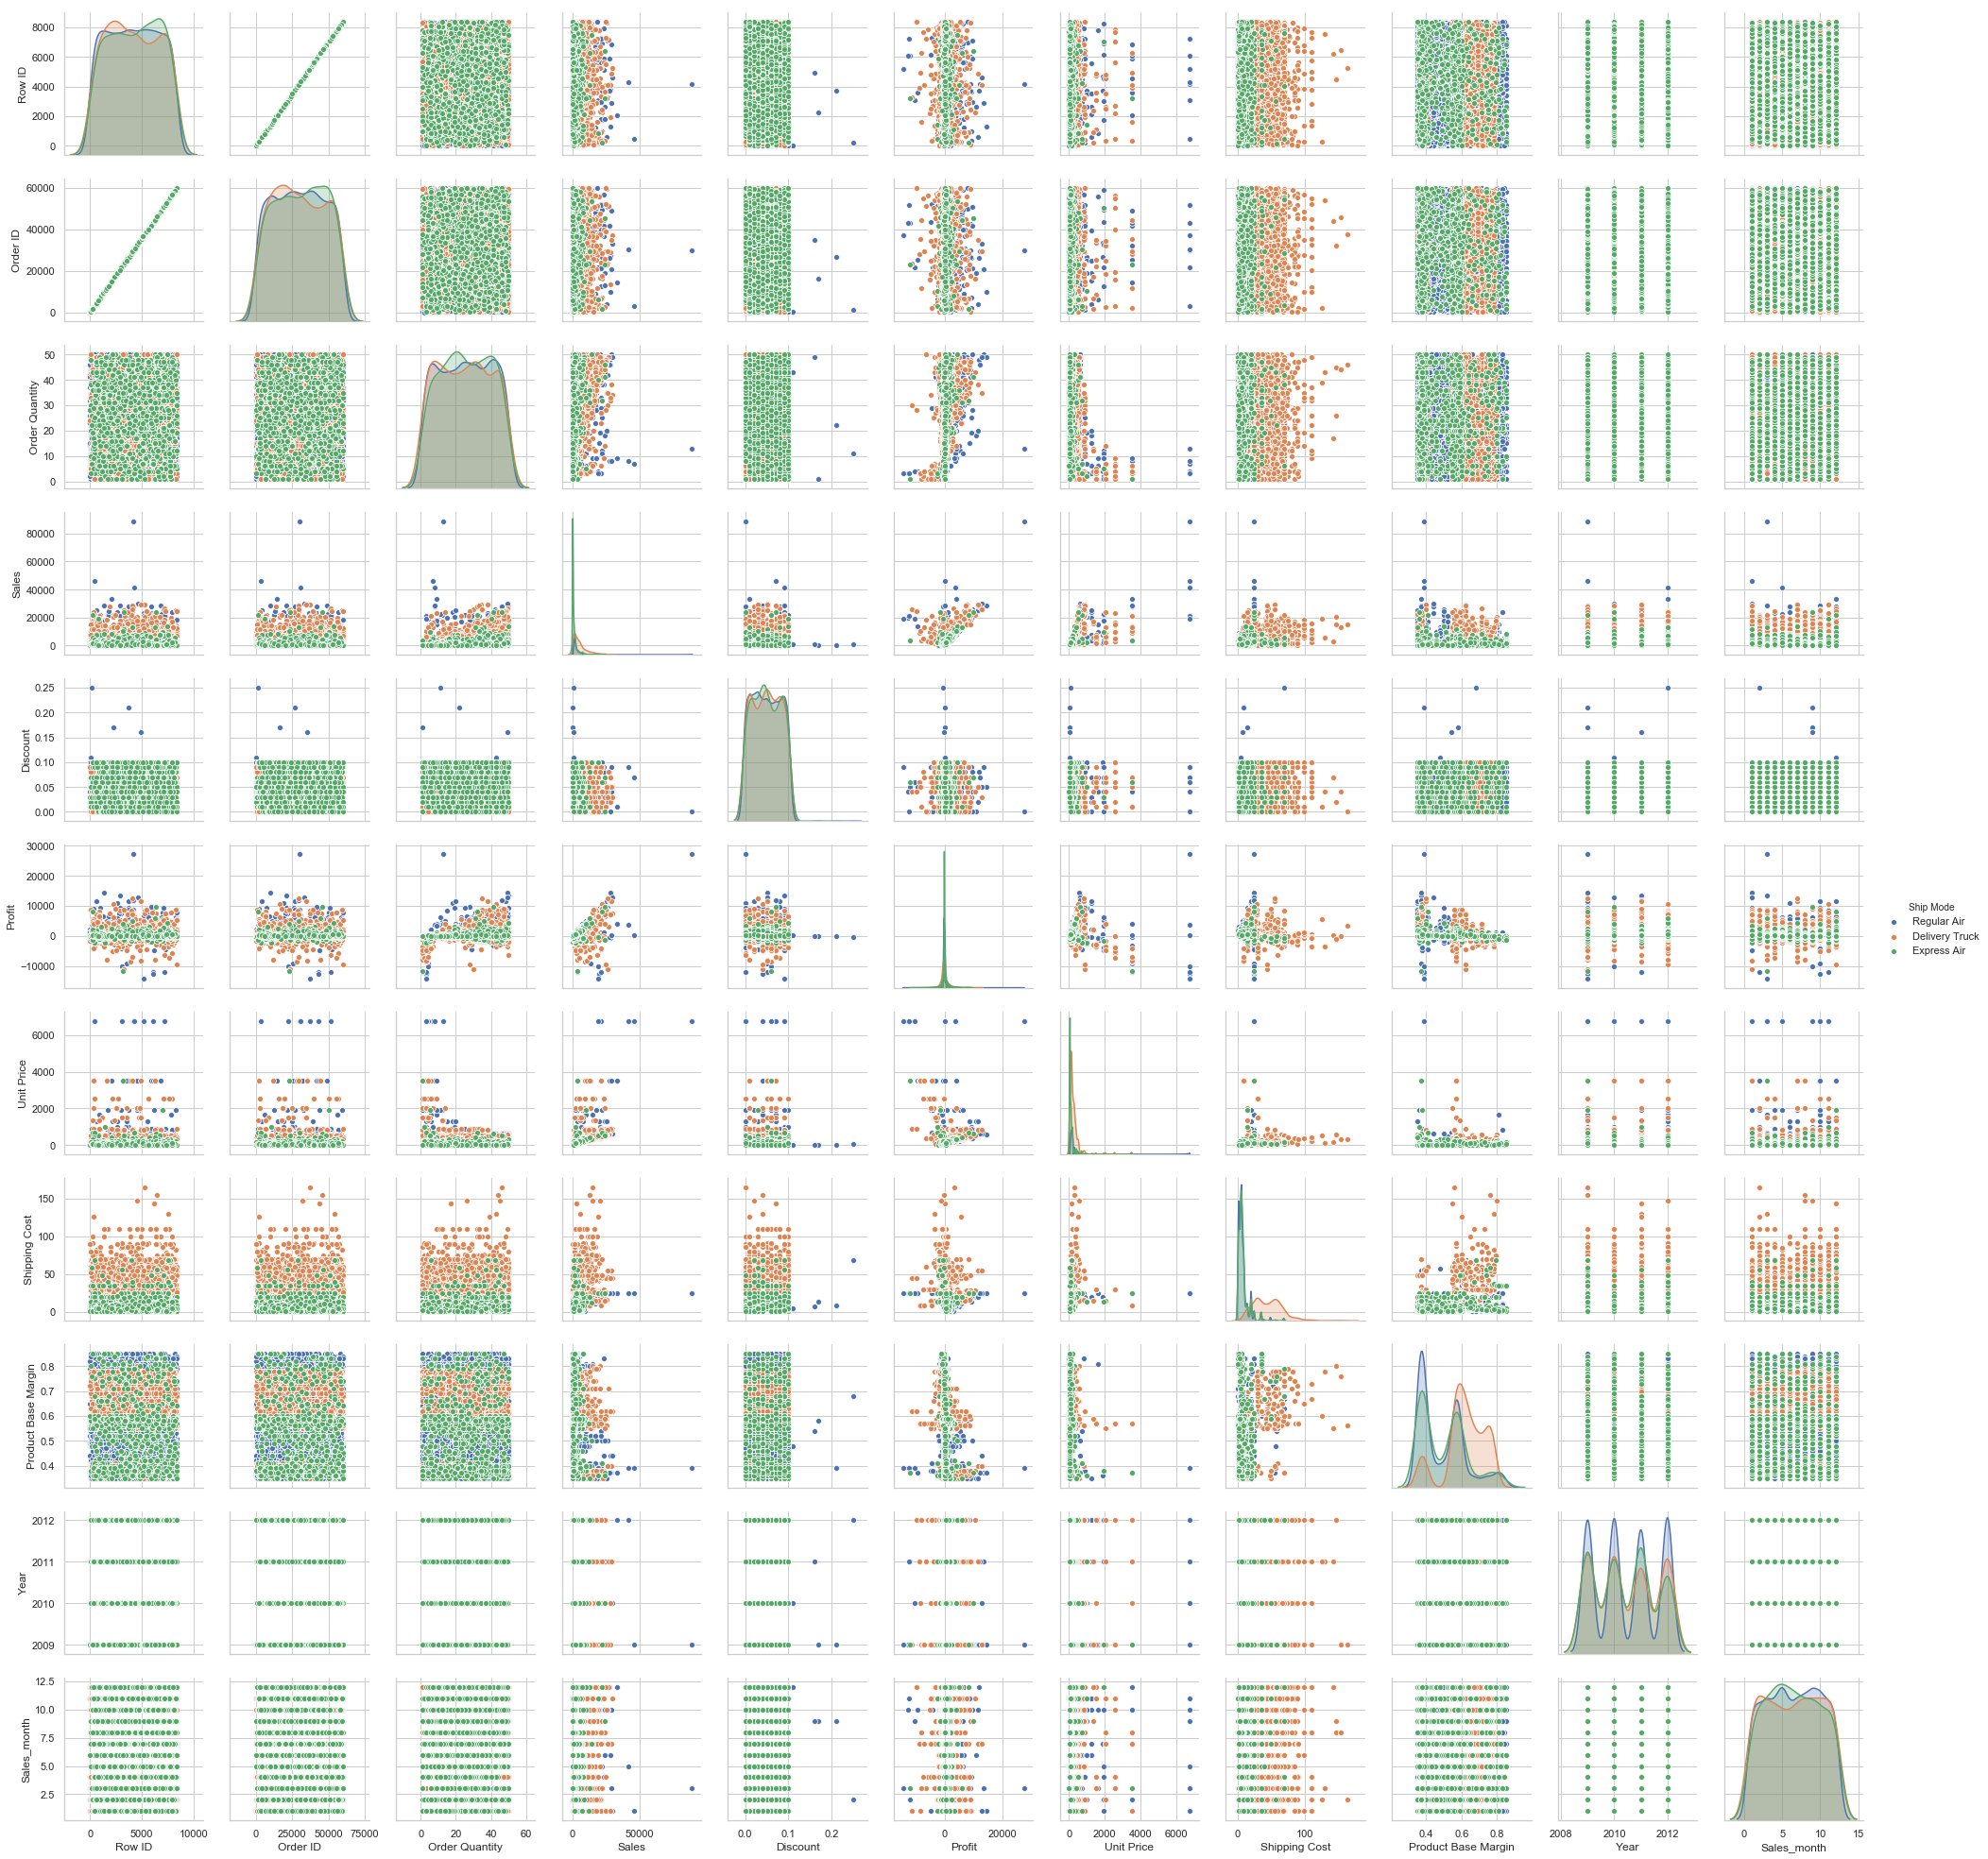

In [200]:
# impact of the ship mode
sns.pairplot(sales,hue ='Ship Mode' )